In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from ripser import ripser

In [2]:
from numpy.random import seed, normal

In [3]:
# import custom functions
from TDA_helper_fcns import load_data, plot_gests, sublevel_set_time_series_dist
from gen_all_pds import plot_ts_pd

In [4]:
def signal_to_noise(s):
    """
    Calculate signal to noise ratio
    s - a signal; 1-D np.array object
    """
    mu_s = s.mean()
    sig2_s = s.var()
    
    return mu_s / sig2_s

### Generating Artificial Noise for Data Set

*Problem:* Imprecise sensors result in truncated signal crests and troughs. This has downstream effects for persisdence diagrams.

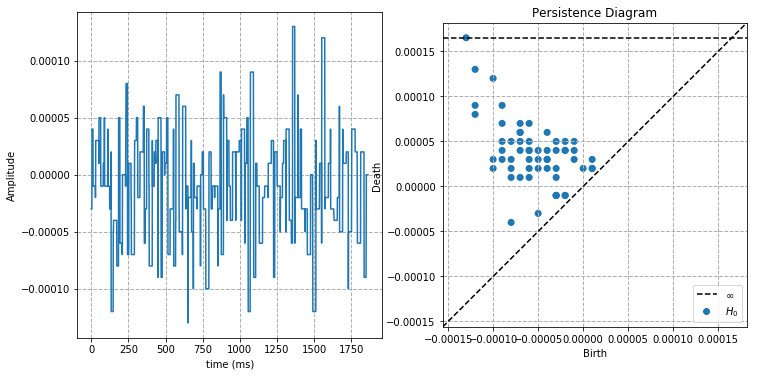

SNR ratio: -3732.9141991074675


In [5]:
sd = load_data(subjects=["19"])
exsig = sd["19"]["6_0_2"][:,2] # example modality in Hz
exsig_ts = np.c_[sd["19"]["6_0_2"][:,0], exsig]
exsig_dmat = sublevel_set_time_series_dist(exsig)
exsig_pd = ripser(exsig_dmat, distance_matrix=True) # calculate persistence

plot_ts_pd(exsig_ts, exsig_pd)
print(f"SNR ratio: {signal_to_noise(exsig)}")

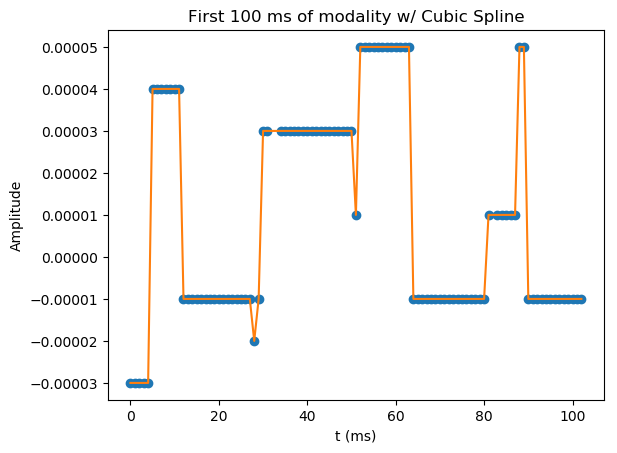

In [15]:
# quick note: while doing the work below I zoomed in on plot and switched from line plot
# to scatter plot. Clearly there are repeated values at crests and troughs
plt.plot(exsig_ts[:100, 0], exsig[:100], "o", exsig_ts[:100, 0], exsig[:100], "-")
plt.xlabel("t (ms)")
plt.ylabel("Amplitude")
plt.title("First 100 ms of modality w/ Cubic Spline")
plt.savefig("./cubic_zoom.png")

### *Solution 1:*

Adding small amounts of random gaussian noise may approximate what a more precise reading would look like.

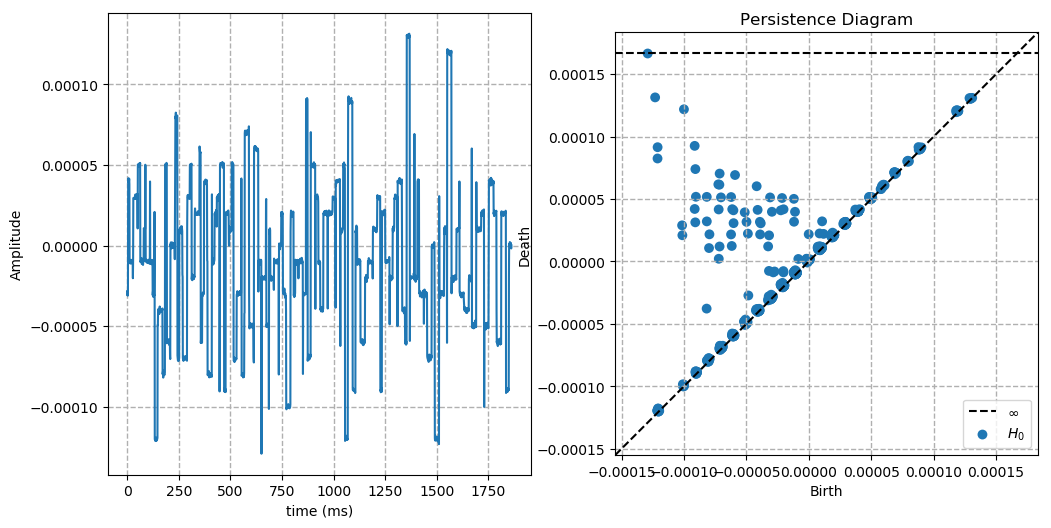

SNR ratio: -3716.0856411483646


In [6]:
n = exsig.shape
seed(1)
gaussig = exsig + normal(loc=0, scale=1e-6, size=n) # add gaussian noise to signal
gaussig_ts = np.c_[sd["19"]["6_0_2"][:,0], gaussig]
gaussig_dmat = sublevel_set_time_series_dist(gaussig)
gaussig_pd = ripser(gaussig_dmat, distance_matrix=True) # calculate persistence

plot_ts_pd(gaussig_ts, gaussig_pd)
print(f"SNR ratio: {signal_to_noise(gaussig)}")

In [7]:
n = exsig.shape
seed(1)
gaussig = exsig + normal(loc=0, scale=1e-6, size=n) # add gaussian noise to signal
gaussig_ts = np.c_[sd["19"]["6_0_2"][:,0], gaussig]



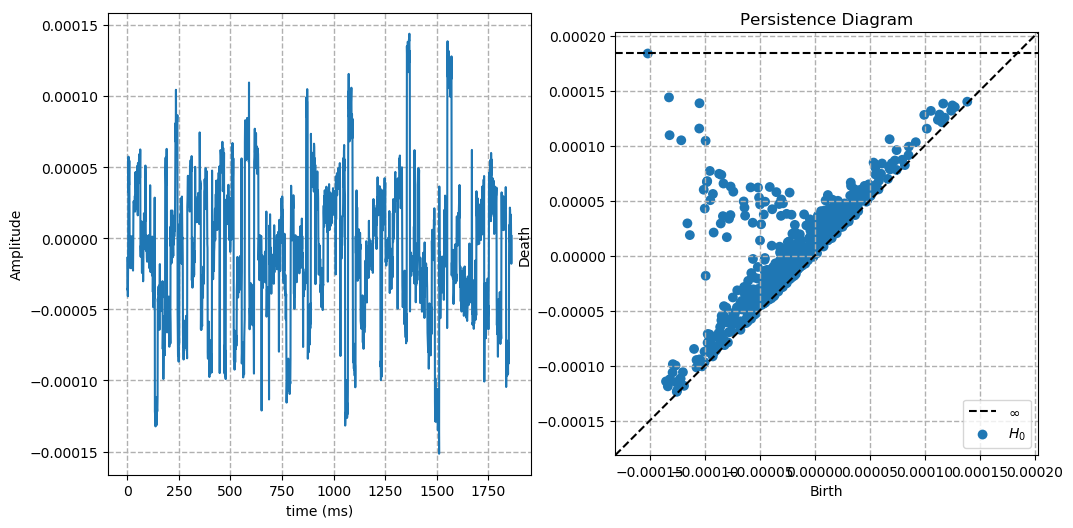

SNR ratio: -3431.352518936185


In [8]:
n = exsig.shape
seed(1)
gaussig = exsig + normal(loc=0, scale=1e-5, size=n) # add gaussian noise to signal
gaussig_ts = np.c_[sd["19"]["6_0_2"][:,0], gaussig]
gaussig_dmat = sublevel_set_time_series_dist(gaussig)
gaussig_pd = ripser(gaussig_dmat, distance_matrix=True) # calculate persistence

plot_ts_pd(gaussig_ts, gaussig_pd)
print(f"SNR ratio: {signal_to_noise(gaussig)}")

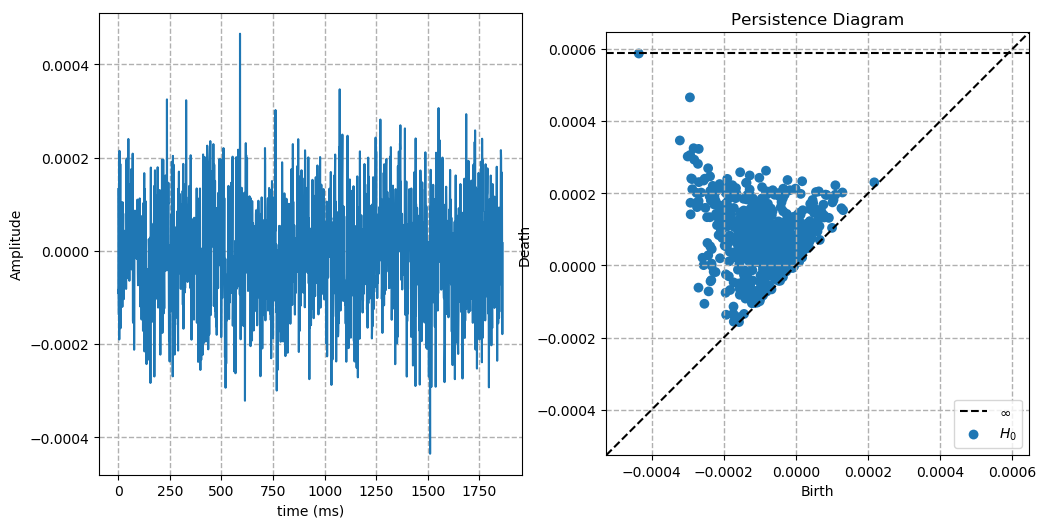

SNR ratio: -389.44709009390203


In [9]:
n = exsig.shape
seed(1)
gaussig = exsig + normal(loc=0, scale=1e-4, size=n) # add gaussian noise to signal
gaussig_ts = np.c_[sd["19"]["6_0_2"][:,0], gaussig]
gaussig_dmat = sublevel_set_time_series_dist(gaussig)
gaussig_pd = ripser(gaussig_dmat, distance_matrix=True) # calculate persistence

plot_ts_pd(gaussig_ts, gaussig_pd)
print(f"SNR ratio: {signal_to_noise(gaussig)}")

### *Solution 2:*

Iterpolation with scipy

In [10]:
from scipy.interpolate import CubicSpline

In [11]:
exsig = sd["19"]["6_0_2"][:,2] # example modality in Hz
exsig_ts = np.c_[sd["19"]["6_0_2"][:,0], exsig]
exsig_dmat = sublevel_set_time_series_dist(exsig)
exsig_pd = ripser(exsig_dmat, distance_matrix=True) # calculate persistence

In [12]:
f = CubicSpline(exsig_ts[:, 0], exsig)
xnew = np.linspace(exsig_ts[:, 0][0], exsig_ts[:, 0][-1], num=n[0])
ynew = f(xnew)

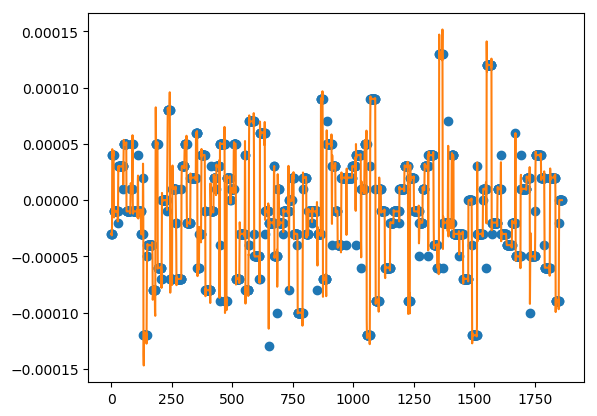

In [13]:
#x, y, kind='linear', axis=-1, copy=True, bounds_error=None, fill_value=nan, assume_sorted=False
plt.plot(exsig_ts[:, 0], exsig, 'o', xnew, ynew, "-")
plt.show()